In [40]:
import pandas as pd, matplotlib.pyplot as plt

In [41]:
dati_regioni=pd.read_json("./data/dati-json/dpc-covid19-ita-regioni.json")
aree = {
    "nord" : [1, 2, 3, 4, 5, 6, 7, 8],
    "centro" : [9, 10, 11, 12],
    "sud" : [13, 14, 15, 16, 17, 18, 19, 20] # 13 abruzzo, 20 sardegna
}

def get_area(codice):
    for k, v in aree.items():
        if int(codice) in v:
            return k


In [42]:
dati_regioni['area']=dati_regioni['codice_regione'].map(get_area)
dati_regioni.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,area
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,sud
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,sud
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,nord
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,sud
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,sud


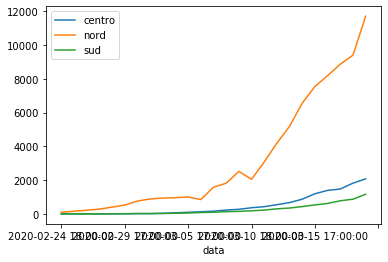

In [43]:
fig, ax = plt.subplots()
for n,t in dati_regioni.groupby("area"):
    t.groupby(["data"]).sum().plot(y="isolamento_domiciliare", ax=ax, label=n)